# Making a model to predict the selling price of a car

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
#creating our dataframe

df = pd.read_csv("data/CAR DETAILS.csv",header=None)
df = df.drop([7],axis=1)
names = ['year','km_driven','fuel','seller_type','transmission','owner','selling_price']
df.columns = names

This is how our dataframe looks like now.

In [3]:
df

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,2014,141000,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...
4335,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,2016,90000,Diesel,Individual,Manual,First Owner,865000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   km_driven      4340 non-null   int64 
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   selling_price  4340 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


We see we have no value which is null.Now you can also see we have datatypes other than Integers when we use df.info(), so now we need to encode the non-integer values to integers. So first we need to know the unique values of each column and then encode for each unique value.

In [5]:
np.unique(df.fuel)

array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)

In [6]:
#encoding fuels

label_encode = {"fuel":{"CNG":0,"Diesel":1,"Electric":2,"LPG":3,"Petrol":4}}
df.replace(label_encode,inplace=True)
values = df['fuel']
values = to_categorical(values)
print(values)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [7]:
np.unique(df.seller_type)

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [8]:
#encoding seller type

label_encode = {"seller_type":{"Dealer":0,"Individual":1,"Trustmark Dealer":2}}
df.replace(label_encode,inplace=True)
values = df['seller_type']
values = to_categorical(values)
print(values)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [9]:
np.unique(df.transmission)

array(['Automatic', 'Manual'], dtype=object)

In [10]:
#encoding transmission

label_encode = {"transmission":{"Automatic":0,"Manual":1}}
df.replace(label_encode,inplace=True)
values = df['transmission']
values = to_categorical(values)
print(values)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
np.unique(df.owner)

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [12]:
#encoding owner

label_encode = {"owner":{"First Owner":0,"Fourth & Above Owner":1,"Second Owner":2,"Test Drive Car":3,"Third Owner":4}}
df.replace(label_encode,inplace=True)
values = df['owner']
values = to_categorical(values)
print(values)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


Let's check how our DataFrame looks like now.

In [13]:
df

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,4,1,1,0,60000
1,2007,50000,4,1,1,0,135000
2,2012,100000,1,1,1,0,600000
3,2017,46000,4,1,1,0,250000
4,2014,141000,1,1,1,2,450000
...,...,...,...,...,...,...,...
4335,2014,80000,1,1,1,2,409999
4336,2014,80000,1,1,1,2,409999
4337,2009,83000,4,1,1,2,110000
4338,2016,90000,1,1,1,0,865000


In [14]:
df.dtypes

year             int64
km_driven        int64
fuel             int64
seller_type      int64
transmission     int64
owner            int64
selling_price    int64
dtype: object

Now we can see all our values are Integer type. Now we can proceed with making our model for predicting the car's selling price using the data in the other 6 columns other than selling_price column

# Drawing Interesting conclusions from our data

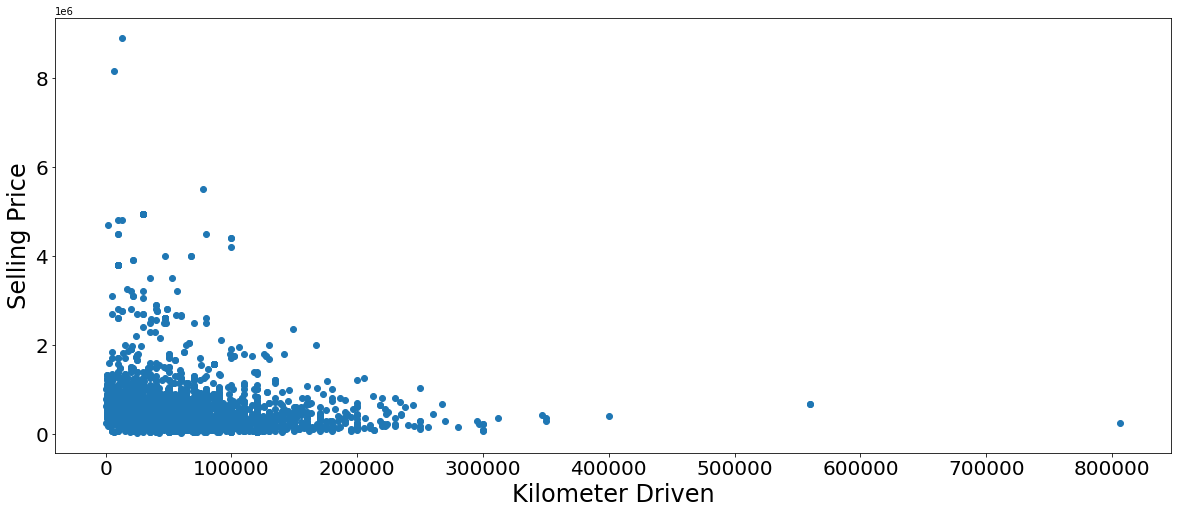

In [15]:
#Plotting the graph 

x=df.km_driven
y=df.selling_price
plt.figure(figsize=(20,8))
plt.xlabel("Kilometer Driven" ,fontsize = 24)
plt.ylabel("Selling Price", fontsize = 24)
plt.xticks (fontsize = 20)
plt.yticks (fontsize = 20)
plt.scatter(x,y)
plt.show()

Oh! we see that most people sell cars at a price upto 20 lakhs and those cars are driven upto 2 lakh kilometers mostly.

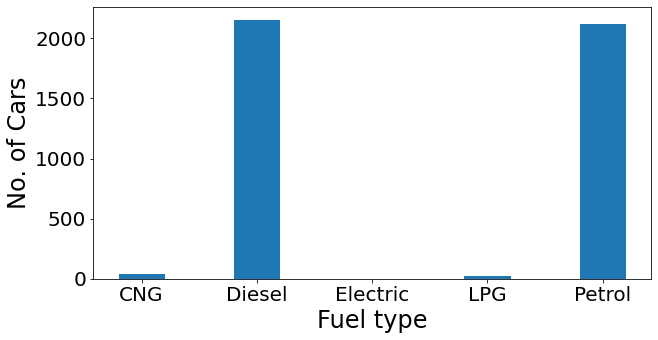

In [16]:
x=["CNG","Diesel","Electric","LPG","Petrol"]
fuel=list(df['fuel'])
y = [fuel.count(0),fuel.count(1),fuel.count(2),fuel.count(3),fuel.count(4)]
plt.figure(figsize=(10,5))
plt.xlabel("Fuel type" ,fontsize = 24)
plt.ylabel("No. of Cars", fontsize = 24)
plt.xticks (fontsize = 20)
plt.yticks (fontsize = 20)
plt.bar(x,y,width=0.4)
plt.show()

In [17]:
y

[40, 2153, 1, 23, 2123]

We can conclude cars using Petrol and Diesel are more in number than CNG, LPG and Electric cars are least in number. 

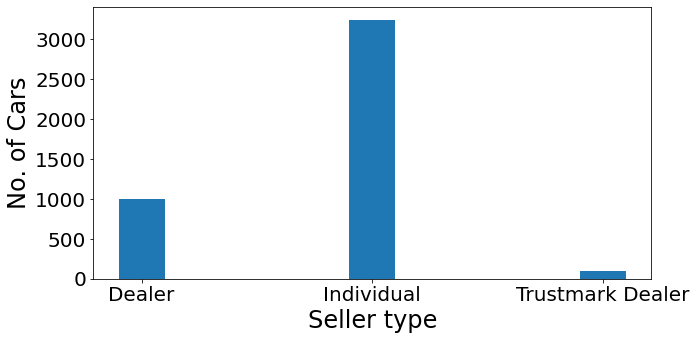

In [18]:
x=["Dealer","Individual","Trustmark Dealer"]
seller=list(df['seller_type'])
y = [seller.count(0),seller.count(1),seller.count(2)]
plt.figure(figsize=(10,5))
plt.xlabel("Seller type" ,fontsize = 24)
plt.ylabel("No. of Cars", fontsize = 24)
plt.xticks (fontsize = 20)
plt.yticks (fontsize = 20)
plt.bar(x,y,width=0.2)
plt.show()

We can conclude that people prefer to buy old cars from an individual.

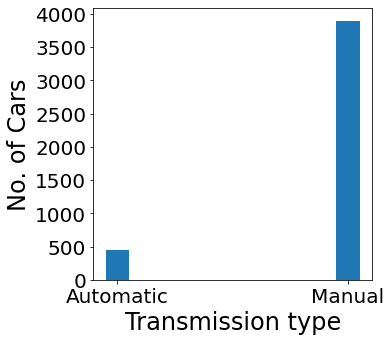

In [19]:
x=["Automatic","Manual"]
transmission=list(df['transmission'])
y = [transmission.count(0),transmission.count(1)]
plt.figure(figsize=(5,5))
plt.xlabel("Transmission type" ,fontsize = 24)
plt.ylabel("No. of Cars", fontsize = 24)
plt.xticks (fontsize = 20)
plt.yticks (fontsize = 20)
plt.bar(x,y,width=0.1)
plt.show()

We can conclude that people prefer to buy cars which have Manual transmission

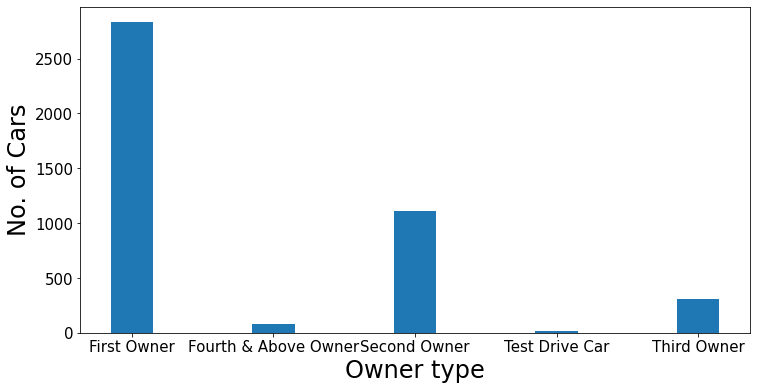

In [20]:
x=["First Owner","Fourth & Above Owner","Second Owner","Test Drive Car","Third Owner"]
owner=list(df['owner'])
y = [owner.count(0),owner.count(1),owner.count(2),owner.count(3),owner.count(4)]
plt.figure(figsize=(12,6))
plt.xlabel("Owner type" ,fontsize = 24)
plt.ylabel("No. of Cars", fontsize = 24)
plt.xticks (fontsize = 15)
plt.yticks (fontsize = 15)
plt.bar(x,y,width=0.3)
plt.show()

We can conclue that firstly before selling the car ,owners were mostly First Owners

# Checking for Erroneous data

To check for outliers and Erroneous data we will plot graphs . We will also Draw Interesting conclusions from our data here also.

4340


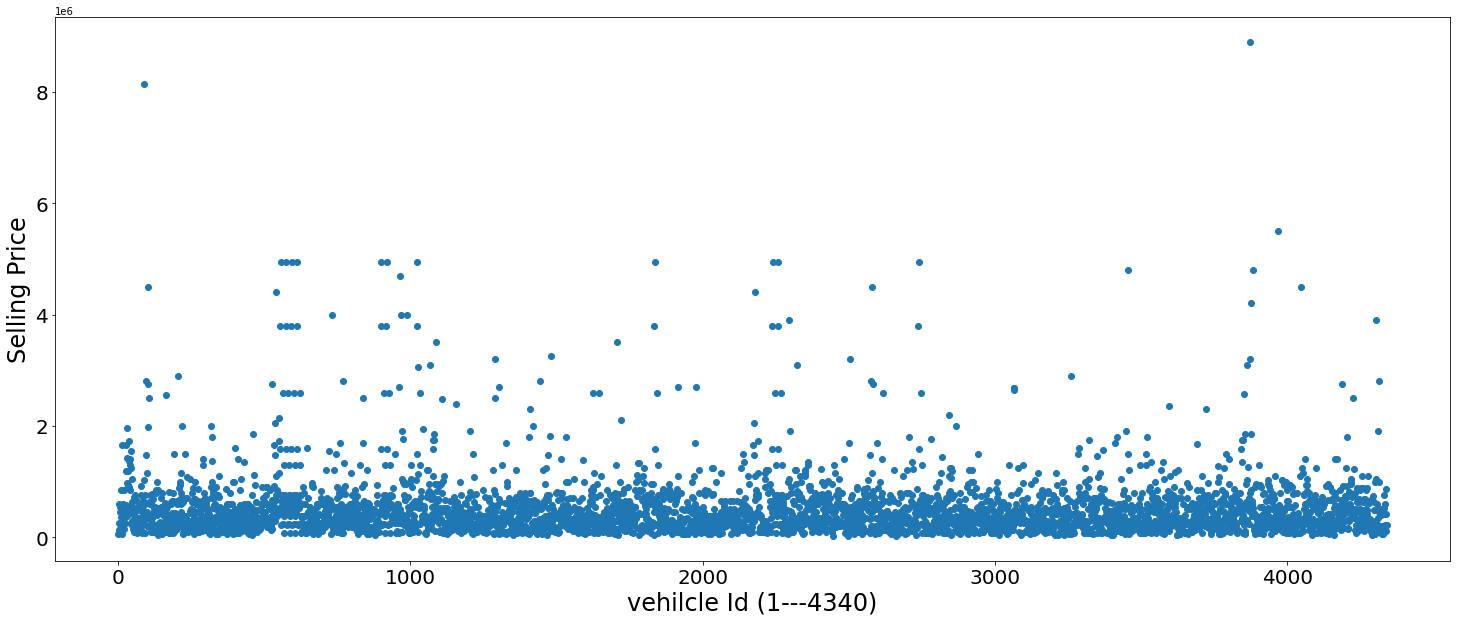

In [21]:
#creating a array of 4340 values ranging from 1 to 4340 
vehicle_id=[]
i=0
for items in df.selling_price:
    i=i+1
    vehicle_id.append(i)

    
#check if the array has 4340 items    
print(len(vehicle_id))  


#Plotting the graph to compare between data in selling_price column
y=df.selling_price
plt.figure(figsize=(25,10))
plt.xlabel("vehilcle Id (1---4340)" ,fontsize = 24)
plt.ylabel("Selling Price", fontsize = 24)
plt.xticks (fontsize = 20)
plt.yticks (fontsize = 20)
plt.scatter(vehicle_id,y)
plt.show()

In [22]:
for item in df.selling_price:
    if item<=0:
        print(item)
print("Done...")   

Done...


We clearly see there is no Erroneous data in selling_price column. We can see most of the cars are priced below 20 lakhs . Lets plot a boxplot to verify this. 

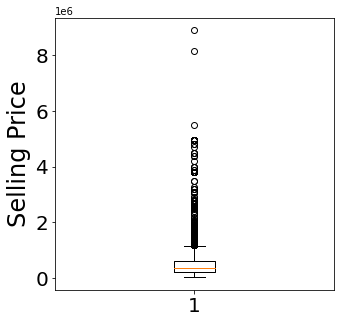

In [23]:
#plotting the boxplot

plt.figure(figsize=(5,5))
plt.ylabel("Selling Price", fontsize = 24)
plt.xticks (fontsize = 20)
plt.yticks (fontsize = 20)
plt.boxplot(y)
plt.show()

Yes we are right that most of the data is concentrated between 0 to 20 lakhs . Now lets find the exact values for minimum , maximum and mean for selling_price column.

In [24]:
df['selling_price'].describe().loc[['mean','min','max']]

mean    5.041273e+05
min     2.000000e+04
max     8.900000e+06
Name: selling_price, dtype: float64

We see our minimum selling price is 20000 and maximum selling price is 89 lakhs and our mean is around 5 lakh . Now lets check for Km_driven

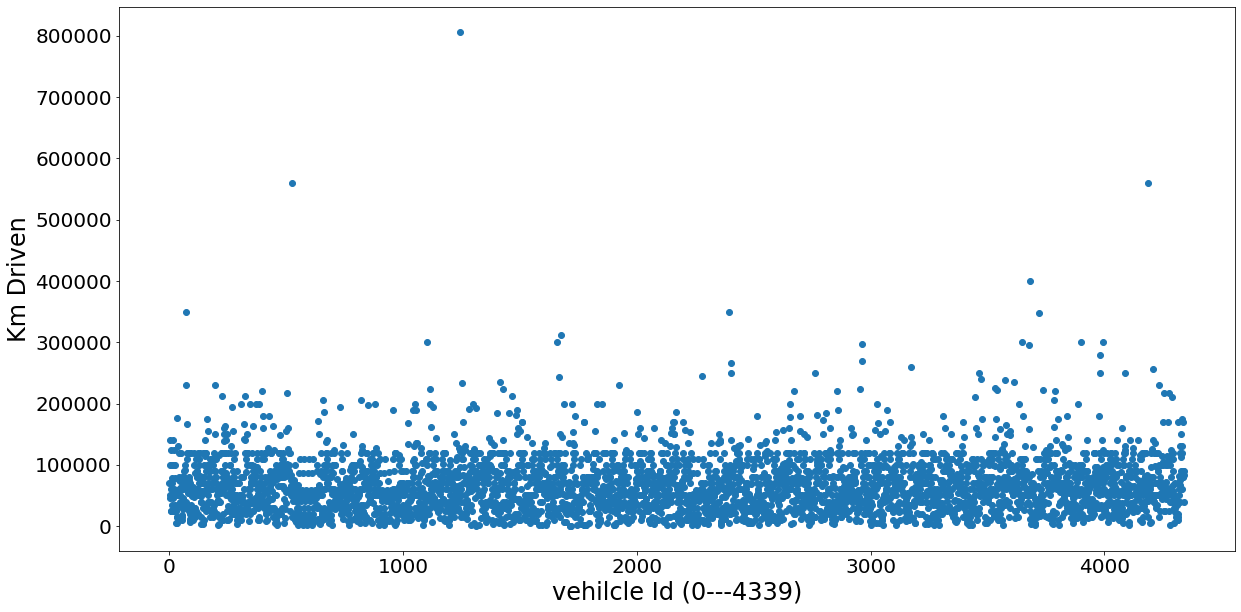

In [25]:
#Plotting the graph to compare between data in km_driven column

y=df.km_driven
plt.figure(figsize=(20,10))
plt.xlabel("vehilcle Id (0---4339)" ,fontsize = 24)
plt.ylabel("Km Driven", fontsize = 24)
plt.xticks (fontsize = 20)
plt.yticks (fontsize = 20)
plt.scatter(vehicle_id,y)#using variable vehicle ID defined Earlier 
plt.show()

In [26]:
for item in df.km_driven:
    if item<=0:
        print(item)
print("Done...")        

Done...


We clearly see there is no Erroneous data in km_driven column. We can see most of the cars are driven upto 2 lakh Kilometers. Lets plot a boxplot to verify this. 

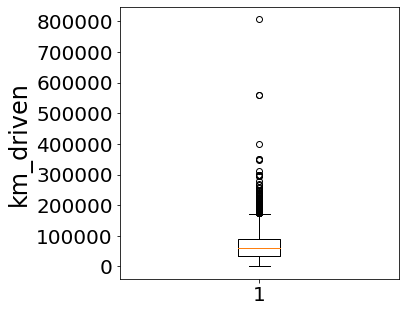

In [27]:
#plotting the boxplot

plt.figure(figsize=(5,5))
plt.ylabel("km_driven", fontsize = 24)
plt.xticks (fontsize = 20)
plt.yticks (fontsize = 20)
plt.boxplot(y)
plt.show()

Yes we are right that most of the data is concentrated between 0 to 2 lakh . Now lets find the exact values for minimum , maximum and mean of km_driven column.

In [28]:
df['km_driven'].describe().loc[['mean','min','max']]

mean     66215.777419
min          1.000000
max     806599.000000
Name: km_driven, dtype: float64

We see our minimum kilometer driven is 1 Km and maximum kilometer driven is around 8 lakhs and our mean is around 66 thousand .

# Creating our model for predicting the selling price of a car

Here , we will use KNN classifier , You can change the values and check the predictions.

In [29]:
bins=[0,125000,200000,280000,350000,450000,590000,799000,8900000]
labels=[1,2,3,4,5,6,7,8]
df['sp_new']=pd.cut(df['selling_price'],bins=bins,labels=labels)


print((list(df['sp_new']).count(1)/4340)*100)
print((list(df['sp_new']).count(2)/4340)*100)
print((list(df['sp_new']).count(3)/4340)*100)
print((list(df['sp_new']).count(4)/4340)*100)
print((list(df['sp_new']).count(5)/4340)*100)
print((list(df['sp_new']).count(6)/4340)*100)
print((list(df['sp_new']).count(7)/4340)*100)
print((list(df['sp_new']).count(8)/4340)*100)

12.649769585253456
12.211981566820276
13.294930875576036
11.935483870967742
11.152073732718893
11.797235023041475
12.995391705069123
13.963133640552996


In [30]:
bins=[0,19000,31000,46000,58000,70000,89000,110000,890000]
labels=[1,2,3,4,5,6,7,8]
df['km_new']=pd.cut(df['km_driven'],bins=bins,labels=labels)


print((list(df['km_new']).count(1)/4340)*100)
print((list(df['km_new']).count(2)/4340)*100)
print((list(df['km_new']).count(3)/4340)*100)
print((list(df['km_new']).count(4)/4340)*100)
print((list(df['km_new']).count(5)/4340)*100)
print((list(df['km_new']).count(6)/4340)*100)
print((list(df['km_new']).count(7)/4340)*100)
print((list(df['km_new']).count(8)/4340)*100)

11.129032258064516
12.28110599078341
12.211981566820276
12.557603686635947
14.562211981566819
10.55299539170507
14.170506912442397
12.534562211981568


In [58]:
# Initialise the KNeighborsClassifier
KNN = KNeighborsClassifier()

# Extract out the x values and y values
x = df[['year','km_new','fuel','seller_type','transmission','owner']]
standardise = StandardScaler() 
x = standardise.fit_transform(x)
y = df['sp_new']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=110)
x_train = standardise.fit_transform(x_train)
x_test = standardise.transform(x_test)

# Train KNN using the x and y values.
KNN = KNN.fit(x_train,y_train)
predict_price = KNN.predict(x_test)
print(f"The predicted selling price of the car is {predict_price}")

The predicted selling price of the car is [3 3 7 6 5 6 5 4 1 6 8 6 4 2 1 5 8 7 8 2 5 1 4 5 7 6 7 8 1 2 8 5 1 1 6 5 7
 7 4 2 4 4 7 6 8 5 5 1 8 7 5 2 4 4 2 4 4 4 2 4 7 4 3 4 1 8 5 3 2 3 4 5 6 4
 1 5 3 1 5 8 1 6 1 2 2 2 3 2 4 6 8 6 3 6 1 7 4 7 3 1 8 5 3 3 6 4 6 3 2 6 2
 5 8 1 1 1 6 8 6 1 2 1 7 8 5 4 3 5 4 5 2 5 6 1 5 3 6 5 8 4 5 7 5 5 3 4 8 4
 2 7 3 1 7 2 4 5 5 1 4 4 4 4 4 8 3 3 7 8 3 4 6 2 3 1 8 3 3 3 4 3 6 1 7 7 6
 3 7 7 4 3 1 1 2 3 7 8 8 5 1 7 7 6 3 1 2 2 2 8 7 5 3 1 3 4 2 8 1 4 8 6 5 4
 4 6 3 5 7 3 3 4 1 5 3 5 3 1 7 2 8 1 7 8 7 4 4 4 3 1 2 8 6 4 3 6 4 6 6 8 1
 6 5 3 3 8 3 5 2 8 4 8 8 1 3 7 1 6 1 1 4 4 2 4 8 2 6 1 8 3 7 1 3 7 6 3 4 4
 2 6 1 3 7 2 3 8 8 5 4 2 1 8 2 8 8 3 2 8 7 5 7 5 3 8 6 1 8 1 6 4 5 8 5 7 2
 2 3 3 2 5 8 2 6 2 4 1 2 6 2 5 4 4 1 8 7 6 7 1 3 1 1 6 6 1 3 8 3 4 4 1 4 5
 4 3 8 2 5 8 1 8 8 7 6 1 5 8 7 8 7 6 4 1 3 3 2 4 7 8 4 8 2 7 5 5 2 6 8 2 5
 6 5 4 2 4 1 4 1 6 4 8 5 8 1 6 5 4 1 1 4 2 6 6 5 6 5 1]


# Checking the accuracy

In [59]:
y_df=pd.DataFrame()
y_df['y_test']=y_test
y_df['prediction']=predict_price
y_df.dtypes

y_test        category
prediction       int64
dtype: object

In [60]:
y_df=y_df.astype(int)

In [61]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 3201 to 1488
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   y_test      434 non-null    int32
 1   prediction  434 non-null    int32
dtypes: int32(2)
memory usage: 6.8 KB


In [62]:
y_df['diff']=y_df['prediction']-y_df['y_test']

In [63]:
y_df

,y_test,prediction,diff
3201,3,3,0
4281,2,3,1
3306,8,7,-1
2781,6,6,0
654,6,5,-1
...,...,...,...
1541,4,6,2
4235,3,5,2
2827,1,6,5
33,8,5,-3


In [64]:
print("Accuracy: ",(list(y_df['diff']).count(0)/len(y_test))*100)# print accuracy

Accuracy:  37.327188940092164


I know the accuracy is too less but that's the best i could do :) Initially i was getting 0 percent accuracy , I made it from 0 to 40 percent :) This is what happened when i tried for neural network ,i got an accuracy of 0, so i switched to KNN .

# THE END - Developed By Mohnish Mahapatra 

In [65]:
# from keras import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution1D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import Sequential

In [66]:
nb_filters=1
kernel_size=1
input_shape=(1,6)
pool_size=0

In [97]:
model = Sequential() 
model.add(Dense(2,input_shape=input_shape,activation='softmax'))
model.add(Convolution1D(nb_filters, kernel_size, padding='same'))
model.add(Activation('softmax'))
model.add(Convolution1D(nb_filters, kernel_size))
model.add(Activation('softmax')) 
# model.add(MaxPooling1D(pool_size=pool_size)) 
# model.add(Dropout(0.25)) 

In [105]:
model = Sequential()
model.add(Dense(2,input_dim=6,activation='sigmoid'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [106]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 14        
                                                                 
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [108]:
model.input.shape

TensorShape([None, 6])

In [109]:
#x_train=x_train.reshape(3906,6)

In [110]:
#x_train

In [ ]:
model.fit(x_train,y_train,epochs=200,shuffle=True, batch_size=1)

Epoch 1/200
3906/3906 [==============================] - 18s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 2/200
3906/3906 [==============================] - 13s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 3/200
3906/3906 [==============================] - 13s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 4/200
3906/3906 [==============================] - 16s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 5/200
3906/3906 [==============================] - 15s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 6/200
3906/3906 [==============================] - 12s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 7/200
3906/3906 [==============================] - 13s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 8/200
3906/3906 [==============================] - 14s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 9/200
3906/3906 [==============================] - 15s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1303
Epoch 10/200
3906/3906 [====